In [10]:
import sys
sys.path.append('../src/utils')

from template_utils import *

In [30]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

In [39]:
G = get_template_graph()
params = get_template_parameter()
dimension = params['dimension']

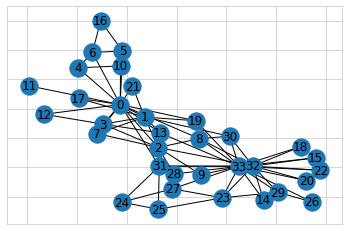

In [40]:
nx.draw_networkx(G,with_labels=True)

In [48]:
def learn_embedding(graph):
#     Convert to undirected graph
    graph = graph.to_undirected()

    start_time = time()

#     Convert to sparse matrix. (Sparse matrix is reduces space by dense (full) matrix)
    A = nx.to_scipy_sparse_matrix(graph)
#     print(A.todense())
#   Normalize graph data
    normalize(A, norm='l1', axis=1, copy=False)
#     Create a sparse matrix  with ones on diagonal. e.g. [[1 0 0],[0 1 0], [0 0 1]]
    I_n = sp.eye(graph.number_of_nodes())
#     ?
    I_min_A = I_n - A
#     print(I_min_A)
#     Solve Singular value decomposition equation.
    u, s, vt = lg.svds(I_min_A, k=dimension + 1, which='SM')

    finish_time = time()
    _X = vt.T
    print("vt.T: ", vt)
    print("X: ", _X)
    
#     Get all row in matrix. And cols start 1. Ignore col[0]
    _X = _X[:, 1:]
    print("X[:,1:] :", _X )
    
    return _X, (finish_time - start_time)
    

In [49]:
graph_embedding, execute_time = learn_embedding(G)

vt.T:  [[ 0.13144117 -0.27710423 -0.07231039  0.33545347  0.11253993 -0.12790174
  -0.12790174  0.11389789 -0.08606573 -0.18658258  0.11253993  0.12743334
   0.45265835 -0.00257915  0.1005159   0.1005159  -0.24800366 -0.14122158
   0.1005159  -0.25769862  0.1005159  -0.14122158  0.1005159   0.0204128
  -0.0877112   0.04630229  0.00267972 -0.25182896 -0.07503392  0.12290429
  -0.25158048  0.11505692  0.22381746 -0.12014029]
 [-0.05919857  0.08652398  0.06856393  0.04037089 -0.03938284  0.05591852
   0.05591852  0.12578412  0.25240353 -0.22305168 -0.03938284 -0.0546472
  -0.01738015 -0.16056007 -0.02342922 -0.02342922  0.10323866  0.02522455
  -0.02342922 -0.26111965 -0.02342922  0.02522455 -0.02342922  0.31743039
   0.09788472  0.17329329 -0.25346042  0.16033273 -0.43314279  0.03562255
   0.2894405  -0.22758884  0.28481222 -0.31019277]
 [-0.13595132  0.1392242  -0.13242649  0.21269379 -0.36931158  0.19714474
   0.19714474  0.10013157 -0.29111907 -0.14436892 -0.36931158 -0.16295176
   0.

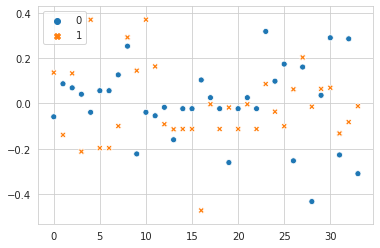

In [37]:
 sns.scatterplot(data=graph_embedding)